In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [21]:
df = pd.read_csv('ecom_processed.csv')
df.head()

,Unnamed: 0,user_id,region,device,channel,session_start,session_end,sessiondurationsec,session_date,month,day,hour_of_day,order_dt,revenue,payment_type,promo_code,payer,time_of_day,final_price
0,0,529697267522,United States,iPhone,социальные сети,2019-05-01 00:06:40,2019-05-01 00:07:06,26,2019-05-01,5,3,0,2019-05-01 00:06:40,9999.0,Mobile payments,0.0,1,ночь,9999.0
1,1,601292388085,United States,PC,organic,2019-05-01 06:56:16,2019-05-01 07:09:18,782,2019-05-01,5,3,7,NaN,NaN,NaN,NaN,0,утро,NaN
2,2,852898876338,United States,Mac,социальные сети,2019-05-01 04:30:45,2019-05-01 04:34:56,251,2019-05-01,5,3,4,NaN,NaN,NaN,NaN,0,ночь,NaN
3,3,998513020664,United States,iPhone,социальные сети,2019-05-01 18:53:42,2019-05-01 18:57:35,233,2019-05-01,5,3,18,NaN,NaN,NaN,NaN,0,вечер,NaN
4,4,240702200943,United States,Mac,социальные сети,2019-05-02 14:04:32,2019-05-02 14:09:51,319,2019-05-02,5,4,14,NaN,NaN,NaN,NaN,0,день,NaN


#### Гипотеза 1: Влияет ли тип устройства на количество покупок в день по каждому региону?

In [22]:
for region in df.region.unique():
    work_with = df[df['region'] == region]
    devices = {
        'iPhone':None,
        'PC':None,
        'Mac':None,
        'Android':None
    }
    norm = False
    for device in devices:
        devices[device] = pd.DataFrame(work_with[work_with['device'] == device].groupby('session_date').agg({'payer':'sum'})).reset_index()['payer']
        if stats.shapiro(devices[device])[1] >= 0.05:
            norm = True
    if norm:
        method = 'ANOVA'
        p = stats.f_oneway(*devices.values())[1]
    else:
        method = 'критерий Краскела-Уоллеса'
        p = stats.kruskal(*devices.values())[1]
    print(f'Для региона {region} распределение дней {"не" if not norm else ""}нормальное, поэтому, используя {method} мы подсчитали p-уровень {round(p, 2)}')
    true = round(p, 2) <= 0.05
    print(f'p-уровень {"больше" if not true else "меньше"} 0.05, поэтому мы {"отвергаем" if true else "принимаем"} нулевую гипотезу, а следовательно, в этом '
          f'регионе зависимост{"ь есть" if true else "и нет"}.')
    print('----------------------------------')

Для региона United States распределение дней ненормальное, поэтому, используя критерий Краскела-Уоллеса мы подсчитали p-уровень 0.37
p-уровень больше 0.05, поэтому мы принимаем нулевую гипотезу, а следовательно, в этом регионе зависимости нет.
----------------------------------
Для региона France распределение дней ненормальное, поэтому, используя критерий Краскела-Уоллеса мы подсчитали p-уровень 0.19
p-уровень больше 0.05, поэтому мы принимаем нулевую гипотезу, а следовательно, в этом регионе зависимости нет.
----------------------------------
Для региона Germany распределение дней ненормальное, поэтому, используя критерий Краскела-Уоллеса мы подсчитали p-уровень 0.64
p-уровень больше 0.05, поэтому мы принимаем нулевую гипотезу, а следовательно, в этом регионе зависимости нет.
----------------------------------
Для региона UK распределение дней ненормальное, поэтому, используя критерий Краскела-Уоллеса мы подсчитали p-уровень 0.76
p-уровень больше 0.05, поэтому мы принимаем нулевую ги

Не влияет

#### Гипотеза 2: Влияет ли тип рекламного канала на количество покупок в день по каждому региону?

Здесь можно проверить аналогичным способом

In [23]:
for region in df.region.unique():
    work_with = df[df['region'] == region]
    no = []
    channels = {channel:None for channel in df['channel'].unique()}
    norm = False
    for channel in channels:
        channels[channel] = pd.DataFrame(work_with[work_with['channel'] == channel].groupby('session_date').agg({'payer':'sum'})).reset_index()['payer']
        if len(channels[channel]) == 0:
            no.append(channel)
            continue
        if stats.shapiro(channels[channel])[1] >= 0.05:
            norm = True
    for n in no:
        del channels[n]
    if norm:
        method = 'ANOVA'
        p = stats.f_oneway(*channels.values())[1]
    else:
        method = 'критерий Краскела-Уоллеса'
        p = stats.kruskal(*channels.values())[1]
    print(f'Для региона {region} распределение просмотров по дням {"не" if not norm else ""}нормальное, поэтому, используя {method} мы подсчитали p-уровень {round(p, 2)}')
    true = round(p, 2) <= 0.05
    print(f'p-уровень {"больше" if not true else "меньше"} 0.05, поэтому мы {"отвергаем" if true else "принимаем"} нулевую гипотезу, а следовательно, в этом '
          f'регионе зависимост{"ь есть" if true else "и нет"}.')
    if no:
        print(f"!ВНИМАНИЕ! Учесть, что в регионе отсутству{'ю' if len(no) > 1 else 'е'}т канал{'ы' if len(no) > 1 else ''} {','.join(no)}")
    print('----------------------------------')


Для региона United States распределение просмотров по дням ненормальное, поэтому, используя критерий Краскела-Уоллеса мы подсчитали p-уровень 0.03
p-уровень меньше 0.05, поэтому мы отвергаем нулевую гипотезу, а следовательно, в этом регионе зависимость есть.
!ВНИМАНИЕ! Учесть, что в регионе отсутствует канал email-рассылки
----------------------------------
Для региона France распределение просмотров по дням ненормальное, поэтому, используя критерий Краскела-Уоллеса мы подсчитали p-уровень 0.13
p-уровень больше 0.05, поэтому мы принимаем нулевую гипотезу, а следовательно, в этом регионе зависимости нет.
!ВНИМАНИЕ! Учесть, что в регионе отсутствует канал социальные сети
----------------------------------
Для региона Germany распределение просмотров по дням ненормальное, поэтому, используя критерий Краскела-Уоллеса мы подсчитали p-уровень 0.95
p-уровень больше 0.05, поэтому мы принимаем нулевую гипотезу, а следовательно, в этом регионе зависимости нет.
!ВНИМАНИЕ! Учесть, что в регионе от

В США влияет, в других регионах нет

#### Гипотеза 3: Средний чек отличается в зависимости от региона

<Axes: xlabel='final_price', ylabel='Count'>

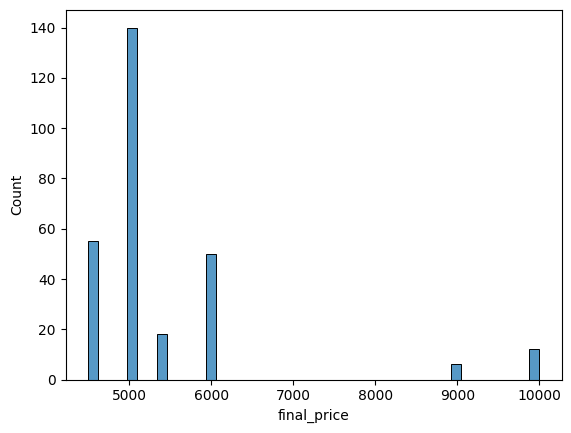

In [24]:
sns.histplot(x=df.final_price)

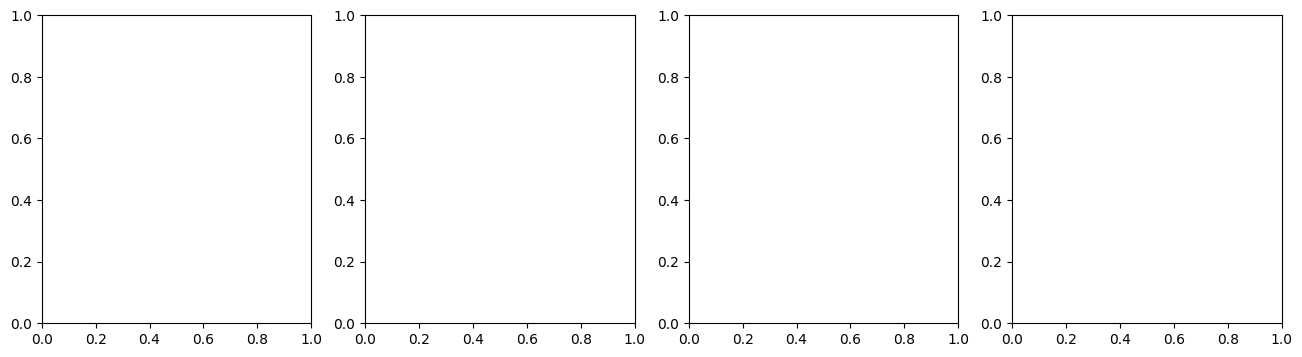

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.hist()


In [32]:
us = df.loc[df['region'] == 'United States', 'final_price'].dropna()
france = df.loc[df['region'] == 'France', 'final_price'].dropna()
germany = df.loc[df['region'] == 'Germany', 'final_price'].dropna()
uk = df.loc[df['region'] == 'UK', 'final_price'].dropna()

0.57

(array([21.,  2.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([4499., 5049., 5599., 6149., 6699., 7249., 7799., 8349., 8899.,
        9449., 9999.]),
 <BarContainer object of 10 artists>)

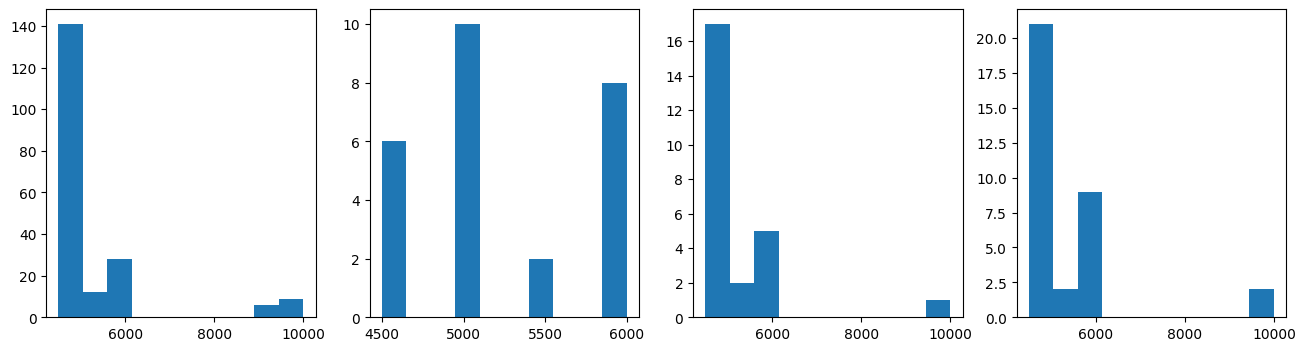

In [34]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
ax1.hist(us)
ax2.hist(france)
ax3.hist(germany)
ax4.hist(uk)

Распределение ненормальное, используем критерий Краскела

In [35]:
stats.kruskal(us, france, germany, uk)[1].round(2)

0.57

P-value больше 0.05, а значит чек не зависит от региона => не отличается

#### Гипотеза 4: средний чек отличается в зависимости от рекламного канала

Проверка аналогичная проверке выше

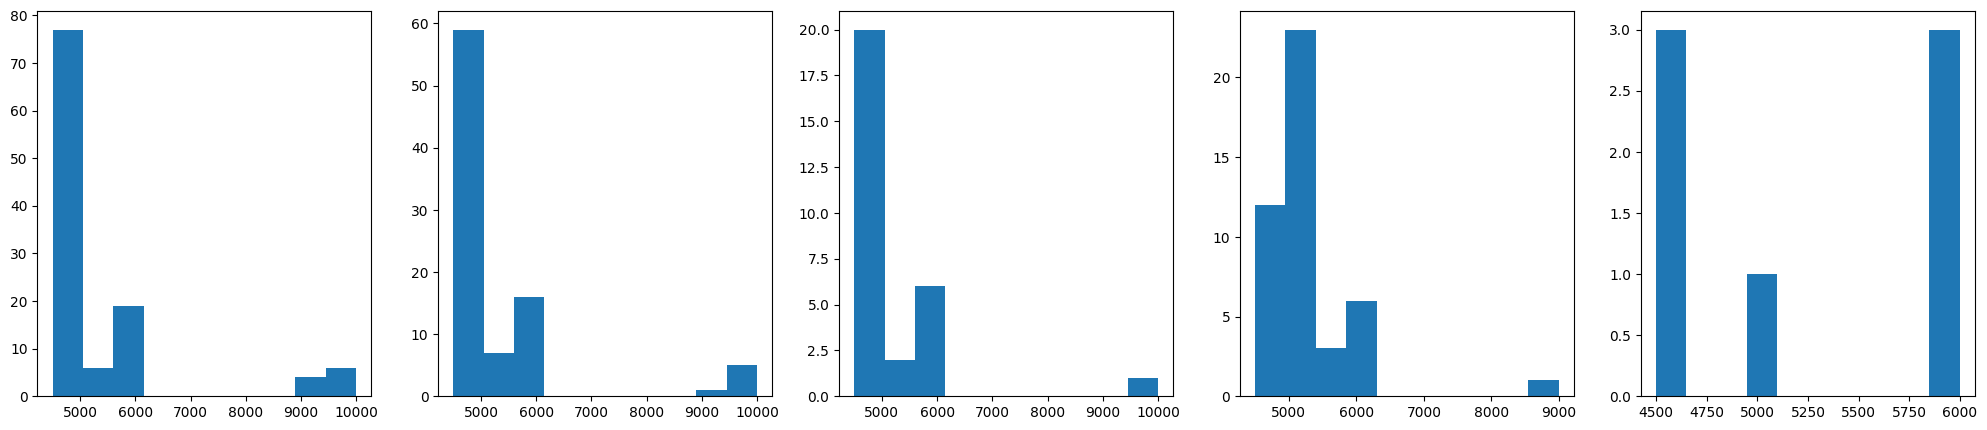

In [36]:
channels = {channel:None for channel in df['channel'].unique()}
for channel in channels:
    channels[channel] = df.loc[df['channel'] == channel, 'final_price'].dropna()
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
ax = 0
for ch in channels:
    axes[ax].hist(channels[ch])
    ax += 1


Распределение ненормальное, используем Краскела

In [38]:
stats.kruskal(*channels.values())[1].round(2)

0.38

P-value больше 0.05, гипотеза не подтвердилась